<a href="https://colab.research.google.com/github/WANGOMES/Data-Analysis-Project-with-Python-and-Pandas/blob/main/An%C3%A1lise_de_dados_com_Python_e_Pandas_aprofundando.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aprofundando: Análise de dados com Python e Pandas**

Wanderson Gomes

In [ ]:
import pandas as pd

In [ ]:
df1 = pd.read_excel('/content/drive/MyDrive/01 - Cursos Livres/DIO/Geração Tech Unimed BH - Ciência de Dados/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Aracaju.xlsx')
df2 = pd.read_excel('/content/drive/MyDrive/01 - Cursos Livres/DIO/Geração Tech Unimed BH - Ciência de Dados/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Fortaleza.xlsx')
df3 = pd.read_excel('/content/drive/MyDrive/01 - Cursos Livres/DIO/Geração Tech Unimed BH - Ciência de Dados/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Natal.xlsx')
df4 = pd.read_excel('/content/drive/MyDrive/01 - Cursos Livres/DIO/Geração Tech Unimed BH - Ciência de Dados/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Recife.xlsx')
df5 = pd.read_excel('/content/drive/MyDrive/01 - Cursos Livres/DIO/Geração Tech Unimed BH - Ciência de Dados/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Salvador.xlsx')

In [ ]:
df = pd.concat([df1, df2, df3, df4, df5])

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [ ]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
33,Natal,2018-01-11,759.00,854,2
24,Natal,2018-04-22,868.00,854,3
81,Recife,2019-01-01,36.52,982,8
115,Fortaleza,2019-03-02,12.23,981,3
111,Recife,2019-03-02,8.00,981,3


In [ ]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [ ]:
df["LojaID"] = df["LojaID"].astype("object")

In [ ]:
# alterando tipo de dados
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

**Tratando valores nulos**

In [ ]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
# substituindo os valores nulos pela média dos dados - Tratamento
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
# substituindo os valores nulos por zero - Tratamento
df["Vendas"].fillna(0, inplace=True)
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
19,Recife,2019-01-01,199.43,983,7
163,Natal,2019-01-02,17.66,1036,3
58,Salvador,2019-01-01,20.64,1037,2
14,Aracaju,2018-01-01,148.21,1521,3
228,Natal,2019-01-02,6.87,1037,3


In [ ]:
# apagando as linhas com valores nulos
df.dropna(inplace=True)

In [ ]:
# apagendo as linhas ocm valores nulos com base apenas em 1 coluna
df.dropna(subset=["Vendas"], inplace=True)

In [ ]:
#removendo linhas que estejam com valores faltantes em todas as colunas
df.dropna(how="all", inplace=True)

**Criando Colunas Novas**

In [ ]:
# Criando a Coluna de Receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [ ]:
#Retorna a maior Receita
df["Receita"].max()

3544.0

In [ ]:
#Retorna a menor Receita
df["Receita"].min()

3.34

In [ ]:
#Top 3 Maiores Receitas
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [ ]:
# 3 Menores Receitas
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [ ]:
# Agrupando por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [ ]:
# Ordenado dataset
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


**Trabalhando com datas**

In [ ]:
#Transformando a coluna data em um formato int
df["Data"] = df["Data"].view("int64")

In [ ]:
df.dtypes

Cidade      object
Data         int64
Vendas     float64
LojaID      object
Qtde         int64
Receita    float64
dtype: object

In [ ]:
#Transformando a coluna Data em um datetime
df["Data"] = pd.to_datetime(df["Data"])

In [ ]:
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [ ]:
#Agrupando por Ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [ ]:
#Criando uma nova coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda
19,Aracaju,2018-01-01,43.96,1520,9,395.64,2018
6,Recife,2019-01-01,16.27,981,6,97.62,2019
6,Aracaju,2018-01-01,35.50,1522,2,71.00,2018
120,Natal,2019-01-02,140.17,1036,2,280.34,2019
214,Salvador,2019-01-02,54.94,1036,2,109.88,2019


In [ ]:
#Extraindo o mês e o dia
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda
78,Aracaju,2018-01-01,154.85,1522,9,1393.65,2018,1,1
64,Natal,2019-02-22,704.00,853,4,2816.00,2019,2,22
238,Salvador,2019-01-03,139.64,1035,1,139.64,2019,1,3
81,Fortaleza,2019-01-01,10.68,1005,1,10.68,2019,1,1
7,Aracaju,2019-01-01,172.22,1522,6,1033.32,2019,1,1


In [ ]:
#Data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [ ]:
#Calculando diferença de dias
df["diferenca_dias"] = df["Data"] - df["Data"].min()

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferenca_dias
3,Aracaju,2018-01-01,3.01,1521,7,21.07,2018,1,1,0 days
99,Recife,2019-01-01,136.72,980,4,546.88,2019,1,1,365 days
36,Salvador,2019-01-01,9.67,1037,1,9.67,2019,1,1,365 days
233,Natal,2019-01-03,172.40,1036,2,344.80,2019,1,3,367 days
239,Natal,2019-01-03,161.41,1037,3,484.23,2019,1,3,367 days


In [ ]:
#Criando a coluna Trimestre
df["Trimestre_venda"] = df["Data"].dt.quarter

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferenca_dias,Trimestre_venda
103,Aracaju,2018-01-01,12.62,1522,3,37.86,2018,1,1,0 days,1
114,Aracaju,2018-01-01,10.17,1520,5,50.85,2018,1,1,0 days,1
49,Natal,2019-04-01,831.00,852,2,1662.00,2019,4,1,455 days,2
121,Recife,2019-03-02,41.55,981,3,124.65,2019,3,2,425 days,1
27,Recife,2019-01-01,22.25,980,7,155.75,2019,1,1,365 days,1


In [ ]:
#Filtrando as Vendas de Março de 2019
vendas_marco_2019 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [ ]:
vendas_marco_2019.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferenca_dias,Trimestre_venda
111,Salvador,2019-03-02,147.35,1037,2,294.70,2019,3,2,425 days,1
29,Natal,2019-03-09,646.00,854,2,1292.00,2019,3,9,432 days,1
117,Recife,2019-03-02,15.42,983,8,123.36,2019,3,2,425 days,1
119,Recife,2019-03-02,152.30,982,7,1066.10,2019,3,2,425 days,1
132,Salvador,2019-03-02,19.61,1036,2,39.22,2019,3,2,425 days,1
124,Recife,2019-03-02,47.98,983,7,335.86,2019,3,2,425 days,1
108,Fortaleza,2019-03-02,152.89,981,4,611.56,2019,3,2,425 days,1
141,Recife,2019-03-02,182.75,983,8,1462.00,2019,3,2,425 days,1
116,Recife,2019-03-02,79.10,982,2,158.20,2019,3,2,425 days,1
127,Salvador,2019-03-02,240.61,1035,3,721.83,2019,3,2,425 days,1


**Visualização de dados**

In [ ]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

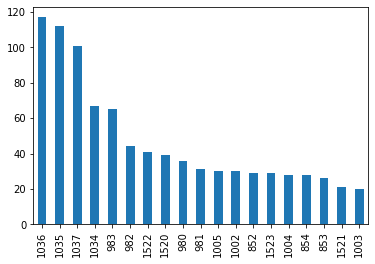

In [ ]:
#Gráfico de Colunas
df["LojaID"].value_counts(ascending=False).plot.bar();

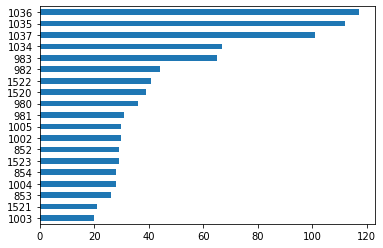

In [ ]:
#Gráfico de Linhas
df["LojaID"].value_counts(ascending=True).plot.barh();

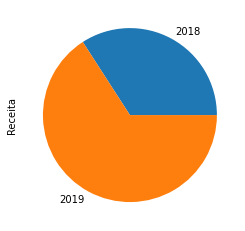

In [ ]:
#Gráfico de Pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [ ]:
#Total de Vendas por Cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

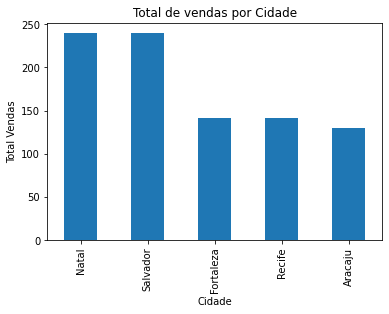

In [ ]:
#Adicionando Titulo e alterado o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total de vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

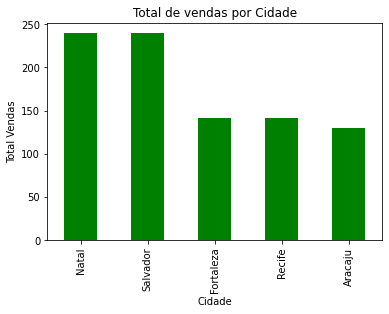

In [ ]:
#Alterando a Cor do Gráfico
df["Cidade"].value_counts().plot.bar(title="Total de vendas por Cidade", color="green")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [ ]:
#Alterando o estilo do Gráfico
plt.style.use("ggplot")

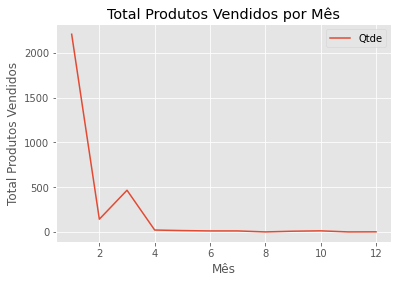

In [ ]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title="Total Produtos Vendidos por Mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend();

In [ ]:
#Selecionando somente 2019
df_2019 = df[df["Ano_Venda"] == 2019]

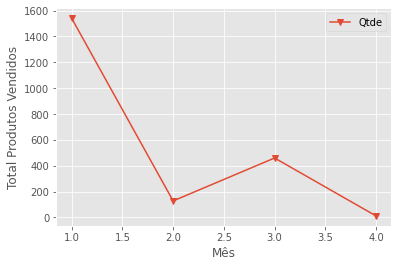

In [ ]:
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker="v")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend();

In [ ]:
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum()

mes_venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

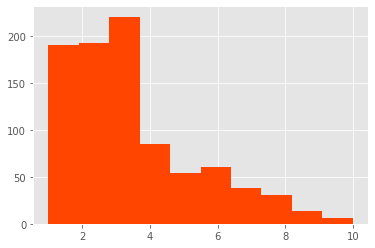

In [ ]:
#Histograma
plt.hist(df["Qtde"], color="orangered");

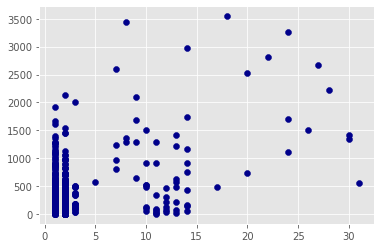

In [ ]:
#Dispersão
plt.scatter(x=df_2019["dia_venda"], y=df_2019["Receita"], color="darkblue");

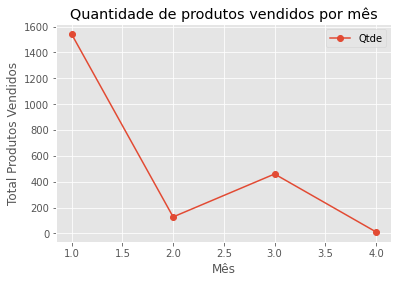

In [ ]:
#Salvando o Gráfico em png
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "o", title="Quantidade de produtos vendidos por mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend()
plt.savefig("Gráfico QTDE X MES.png")